# Finding Pension Spikers Through Data Science

# Contents
- [Data Cleaning](#data-cleaning)
    - [Pension Data](#pension-data)
    - [Pre-retirement Salary Data](#retirement-data)
- [Joining Tables](#joining-tables)
- [Salary and Pension Data for Analysis](#salary-4-analysis)

<div id='data-cleaning'/>
# Data Cleaning and EDA

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<div id='pension-data'/>
## Pension Data

In [3]:
# Read pension data from SJ Fed City Employees Retirement System, drop the empty columns, and filter by employees
# who retired in 2015

df_1 = pd.read_csv('san-jose-federated-city-employees-retirement-syste-2015.csv')

df_1 = df_1.drop(["job_title","employer","benefits_amount","notes"], axis=1)
ret_1 = df_1[df_1["year_of_retirement"]==2015]

df_2 = pd.read_csv('san-jose-police-and-fire-retirement-plan-2015.csv')
df_2 = df_2.drop(["job_title","employer","benefits_amount","notes"], axis=1)
ret_2 = df_2[df_2["year_of_retirement"]==2015]

In [4]:
# df_1.shape
# df_2.shape

df = pd.concat([df_1,df_2])

df = df[df["pension_amount"] !=0]
df = df[df["years_of_service"] !="Beneficiary"]

service_years = []
for item in df["years_of_service"]:
    service_years.append(float(item))
df["years_of_service"] = service_years

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201 entries, 0 to 2096
Data columns (total 8 columns):
employee_name         4201 non-null object
pension_amount        4201 non-null float64
disability_amount     4201 non-null float64
total_amount          4201 non-null float64
years_of_service      4201 non-null float64
year_of_retirement    4201 non-null int64
year                  4201 non-null int64
pension_system        4201 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 295.4+ KB


In [5]:
df.columns

Index([u'employee_name', u'pension_amount', u'disability_amount',
       u'total_amount', u'years_of_service', u'year_of_retirement', u'year',
       u'pension_system'],
      dtype='object')

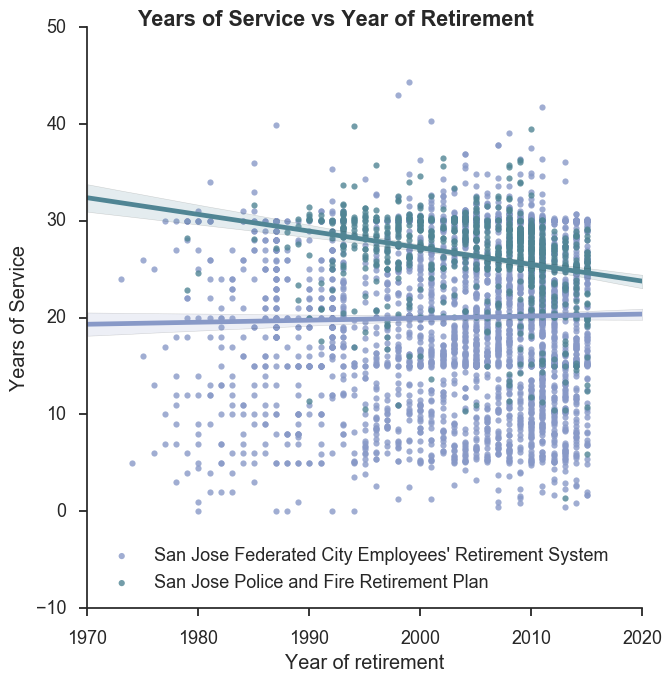

In [6]:
sns.set(style="ticks", context="talk")

# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)


# Plot tip as a function of toal bill across days
g = sns.lmplot(x="year_of_retirement", y="years_of_service", hue = "pension_system", data=df,
               palette=pal, size=7,legend=False)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year of retirement", "Years of Service")
g.fig.suptitle('Years of Service vs Year of Retirement',fontweight="bold")
plt.legend(loc='lower left')

plt.savefig('/Users/andrewgstark/Desktop/DSI-SF-4-andrewgstark/gitpages/andrewgstark.github.io/JEKYLL-SITE-REPOSITORY-NAME/myblog/assets/service_vs_yearofretire.png',transparent=True)

In [7]:
df[df["pension_system"] == "San Jose Federated City Employees' Retirement System"].describe()

,pension_amount,disability_amount,total_amount,years_of_service,year_of_retirement,year
count,3276.000000,3276.0,3276.000000,3276.000000,3276.000000,3276.0
mean,46875.434432,0.0,46875.434432,20.033294,2003.971001,2015.0
std,26822.587379,0.0,26822.587379,8.117080,8.749303,0.0
min,238.440000,0.0,238.440000,0.000000,1973.000000,2015.0
25%,26800.050000,0.0,26800.050000,15.000000,1999.750000,2015.0
50%,44156.340000,0.0,44156.340000,20.445000,2006.000000,2015.0
75%,62886.960000,0.0,62886.960000,27.142500,2011.000000,2015.0
max,194250.120000,0.0,194250.120000,44.300000,2015.000000,2015.0


In [8]:
df[df["pension_system"] == "San Jose Police and Fire Retirement Plan"].describe()

,pension_amount,disability_amount,total_amount,years_of_service,year_of_retirement,year
count,925.000000,925.0,925.000000,925.000000,925.000000,925.0
mean,102388.986422,0.0,102388.986422,26.305946,2005.295135,2015.0
std,34886.875844,0.0,34886.875844,4.343327,7.047491,0.0
min,4059.720000,0.0,4059.720000,1.340000,1979.000000,2015.0
25%,81937.440000,0.0,81937.440000,25.040000,2000.000000,2015.0
50%,100862.280000,0.0,100862.280000,27.130000,2008.000000,2015.0
75%,122042.640000,0.0,122042.640000,29.120000,2011.000000,2015.0
max,249286.560000,0.0,249286.560000,39.850000,2015.000000,2015.0


In [9]:
#combine the 2 dataframes from the 2 retirement systems and rename the columns

frames = [ret_1,ret_2]
retirees = pd.concat(frames)
retirees.columns = ["retiree_name","pension_15","disability_15","total_pension_15","years_of_service","year_of_retirement","year","pension_system"]

In [10]:
len(df_1.year_of_retirement.unique())
#df_2[df_2["year_of_retirement"] == 1966]

45

In [11]:
#df_1.info()
df_1_beneficiaries = df_1[df_1["years_of_service"] == "Beneficiary"]
df_1_workers = df_1[df_1["years_of_service"] != "Beneficiary"]

service_years = []
for item in df_1_workers["years_of_service"]:
    service_years.append(float(item))
df_1_workers["years_of_service"] = service_years
#df_1_workers.info()

# df_2_beneficiaries
#df_1 = df_1["years_of_service"]
#years_service = years_service.sort_values(inplace=True)
# for i in years_service:
    

/Users/andrewgstark/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
df_2_beneficiaries = df_2[df_2["years_of_service"] == "Beneficiary"]
df_2_workers = df_2[df_2["years_of_service"] != "Beneficiary"]

service_years = []
for item in df_2_workers["years_of_service"]:
    service_years.append(float(item))
df_2_workers["years_of_service"] = service_years
df_2_workers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 0 to 2097
Data columns (total 8 columns):
employee_name         1851 non-null object
pension_amount        1851 non-null float64
disability_amount     1851 non-null float64
total_amount          1851 non-null float64
years_of_service      1851 non-null float64
year_of_retirement    1851 non-null int64
year                  1851 non-null int64
pension_system        1851 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 130.1+ KB


/Users/andrewgstark/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
df_1_workers_disability = df_1_workers[df_1_workers["disability_amount"] != 0]
# df_1_workers_disability.shape
# 211 rows

df_1_workers_pension = df_1_workers[df_1_workers["pension_amount"] != 0]
#df_1_workers_pension.shape
#3276 rows

#df_1_workers_pension

In [14]:
df_2_workers_disability = df_2_workers[df_2_workers["disability_amount"] != 0]
df_2_workers_disability.shape
#926 rows

df_2_workers_pension = df_2_workers[df_2_workers["pension_amount"] != 0]
df_2_workers_pension.shape
#925 rows

#df_1_workers_pension

(925, 8)

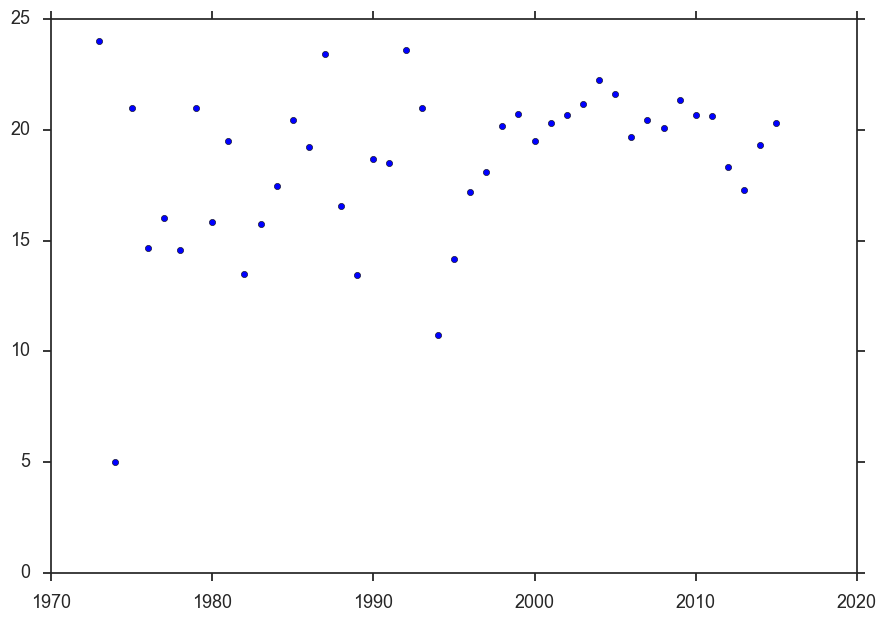

In [15]:
a = df_1_workers_pension.groupby(["year_of_retirement"])[["years_of_service"]].mean()
plt.scatter(a.index, a["years_of_service"])

#df_15.groupby(["name_word_count"])[["name_word_count"]].count()

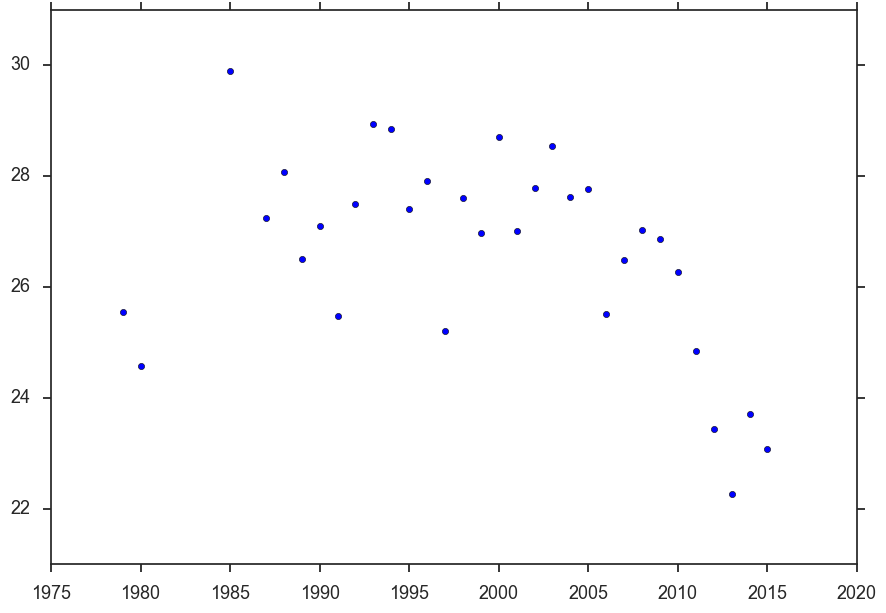

In [16]:
a = df_2_workers_pension.groupby(["year_of_retirement"])[["years_of_service"]].mean()
plt.scatter(a.index, a["years_of_service"])

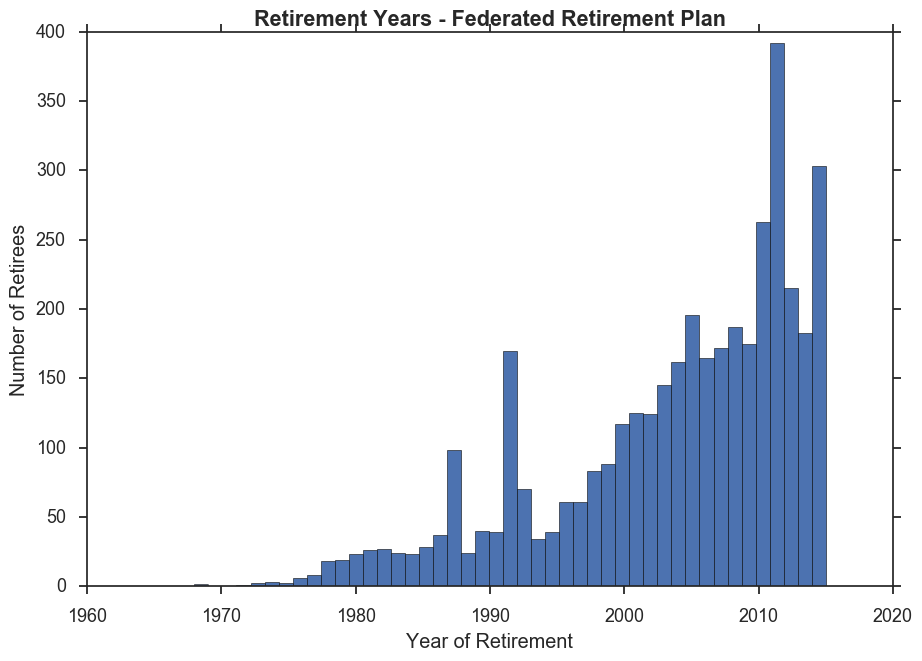

In [17]:
x = df_1.year_of_retirement.values

plt.hist(x, bins = 45)
plt.title("Retirement Years - Federated Retirement Plan", fontweight="bold")
plt.xlabel("Year of Retirement")
plt.ylabel("Number of Retirees")
#plt.show()
plt.savefig('/Users/andrewgstark/Desktop/DSI-SF-4-andrewgstark/gitpages/andrewgstark.github.io/JEKYLL-SITE-REPOSITORY-NAME/myblog/assets/retire_years_federated.png',transparent=True)

In [18]:
len(x)

3979

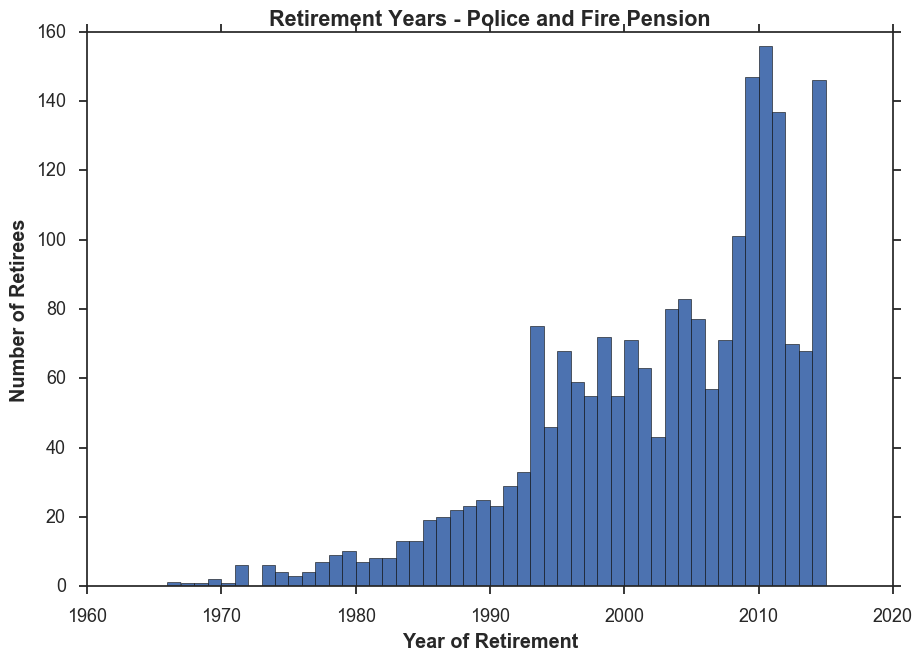

In [19]:
x = df_2.year_of_retirement.values

plt.hist(x, bins = 49)
plt.title("Retirement Years - Police and Fire Pension",fontweight="bold")
plt.xlabel("Year of Retirement",fontweight="bold")
plt.ylabel("Number of Retirees",fontweight="bold")
#plt.show()

plt.savefig('/Users/andrewgstark/Desktop/DSI-SF-4-andrewgstark/gitpages/andrewgstark.github.io/JEKYLL-SITE-REPOSITORY-NAME/myblog/assets/retire_years_policefire.png',transparent=True)


In [20]:
# filter out pension beneficiaries and those receive disability pensions

retirees = retirees[retirees["years_of_service"]!="Beneficiary"]

retirees = retirees[retirees["disability_15"] == 0.]

In [21]:
# change years of service from object to float

years_of_service = retirees["years_of_service"]
yos_float= []
for duration in years_of_service:
    duration = float(duration)
    yos_float.append(duration)
retirees["years_of_service"] = yos_float

In [22]:
retirees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 7 to 2078
Data columns (total 8 columns):
retiree_name          150 non-null object
pension_15            150 non-null float64
disability_15         150 non-null float64
total_pension_15      150 non-null float64
years_of_service      150 non-null float64
year_of_retirement    150 non-null int64
year                  150 non-null int64
pension_system        150 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 10.5+ KB


In [23]:
retirees#.describe()

,retiree_name,pension_15,disability_15,total_pension_15,years_of_service,year_of_retirement,year,pension_system
7,Hans Larsen,149908.80,0.0,149908.80,30.13,2015,2015,San Jose Federated City Employees' Retirement ...
33,Leslye Corsiglia,128877.12,0.0,128877.12,24.07,2015,2015,San Jose Federated City Employees' Retirement ...
52,Terri Gomes,119630.64,0.0,119630.64,29.75,2015,2015,San Jose Federated City Employees' Retirement ...
194,Jamie Matthews,90925.80,0.0,90925.80,30.01,2015,2015,San Jose Federated City Employees' Retirement ...
314,Gregory Jobe,81591.96,0.0,81591.96,28.81,2015,2015,San Jose Federated City Employees' Retirement ...
386,Evelyn Slotnick,77757.84,0.0,77757.84,24.09,2015,2015,San Jose Federated City Employees' Retirement ...
508,Theodore Peck,73955.40,0.0,73955.40,30.03,2015,2015,San Jose Federated City Employees' Retirement ...
591,Karla Enany,70535.52,0.0,70535.52,28.00,2015,2015,San Jose Federated City Employees' Retirement ...
622,David Arroyo,69688.92,0.0,69688.92,30.06,2015,2015,San Jose Federated City Employees' Retirement ...
734,Peggy Rudd,65765.16,0.0,65765.16,26.80,2015,2015,San Jose Federated City Employees' Retirement ...


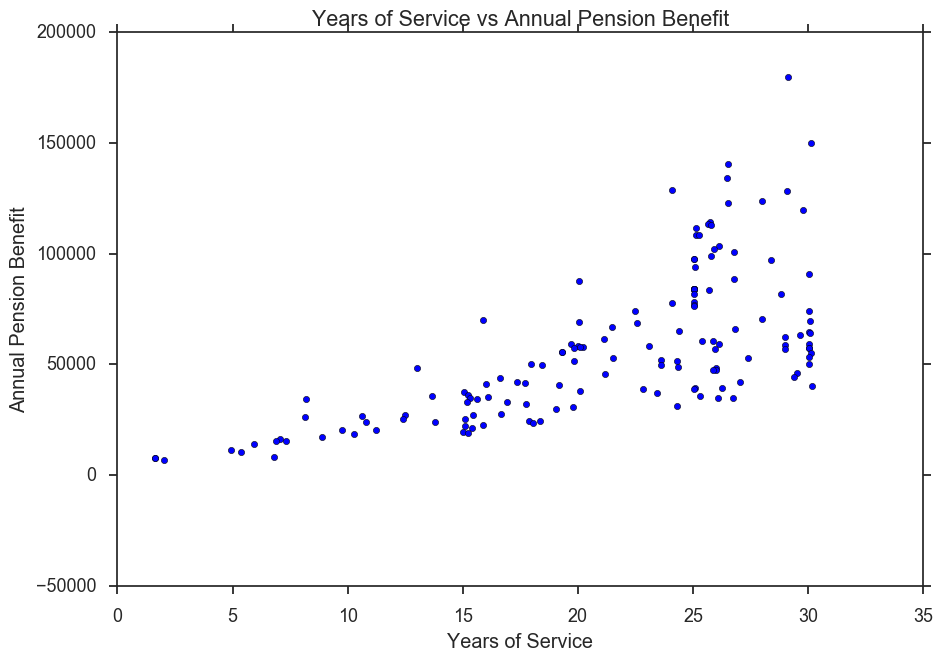

In [24]:
x = retirees["years_of_service"]
y = retirees["pension_15"]

plt.scatter(x, y,)
plt.title("Years of Service vs Annual Pension Benefit")
plt.xlabel("Years of Service")
plt.ylabel("Annual Pension Benefit")
plt.show()

In [25]:
# Find duplicate names among those who retired in 2015 - there are three
#retirees["retiree_name"].value_counts()

retiree_dups = ["Gilbert Hernandez","David Arroyo", "Ann Danforth"]
retirees.loc[retirees['retiree_name'].isin(retiree_dups)]

,retiree_name,pension_15,disability_15,total_pension_15,years_of_service,year_of_retirement,year,pension_system
622,David Arroyo,69688.92,0.0,69688.92,30.06,2015,2015,San Jose Federated City Employees' Retirement ...
796,David Arroyo,64030.20,0.0,64030.20,30.06,2015,2015,San Jose Federated City Employees' Retirement ...
992,Gilbert Hernandez,58568.40,0.0,58568.40,29.01,2015,2015,San Jose Federated City Employees' Retirement ...
1074,Gilbert Hernandez,56921.64,0.0,56921.64,29.01,2015,2015,San Jose Federated City Employees' Retirement ...
3816,Ann Danforth,7610.04,0.0,7610.04,1.63,2015,2015,San Jose Federated City Employees' Retirement ...
3817,Ann Danforth,7610.04,0.0,7610.04,1.63,2015,2015,San Jose Federated City Employees' Retirement ...


In [26]:
# It's not clear why these retirees have duplicate records. Will retain the record with the higher pension payment,
# and delete the other one. 
retirees.drop([796,1074,3817], inplace=True)

In [27]:
retirees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 7 to 2078
Data columns (total 8 columns):
retiree_name          147 non-null object
pension_15            147 non-null float64
disability_15         147 non-null float64
total_pension_15      147 non-null float64
years_of_service      147 non-null float64
year_of_retirement    147 non-null int64
year                  147 non-null int64
pension_system        147 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 10.3+ KB


<div id='retirement-data'/>
## Pre-Retirement Salary Data

In [30]:
# Read the salary files and find the duplicate names in the payroll files

def find_double_names(df, name_field):
    employee_name_counts = df[name_field].value_counts()
    double_names = []
    for name in employee_name_counts.index:
        if employee_name_counts.loc[name] > 1:
            double_names.append(name)
    return double_names

df_13 = pd.read_csv('City Comp 2013.csv')
df_14 = pd.read_csv('City Comp 2014.csv')
df_15 = pd.read_csv('City Comp 2015.csv')

In [31]:
df_15.shape

(7821, 13)

In [32]:
# append the year to the column names, so we know the year the data came from 

def change_col_names(df,year):
    new_cols = []
    for col in df.columns:
        new_cols.append(col+year)
    df.columns = new_cols
    return None
    
change_col_names(df_15, "-2015")
change_col_names(df_14, "-2014")
change_col_names(df_13, "-2013")

In [37]:
# Rename the employee's name column, which is the field to join the 3 tables

df_15.rename(columns={'Name-2015':'Name'}, inplace=True)
df_14.rename(columns={'Name-2014':'Name'}, inplace=True)
df_13.rename(columns={'NAME-2013':'NAME'}, inplace=True)


In [33]:
a = df_15.groupby(["Department-2015"])["Total Cash Compensation-2015", "Retirement Contributions - City Paid*-2015", 'Long Term Disability, Life, Medicare-2015','Misc Employment Related Costs-2015'].sum()
a["City Paid Retirement Cost as Percent of Total Cash Pay"] = a["Retirement Contributions - City Paid*-2015"]/a["Total Cash Compensation-2015"]
a["LTD, Life, Medicare as Percent of Total Cash Pay"] = a["Long Term Disability, Life, Medicare-2015"]/a["Total Cash Compensation-2015"]
a["Misc Employer Costs as Percent of Total Cash Pay"] = a["Misc Employment Related Costs-2015"]/a["Total Cash Compensation-2015"]
a

,Total Cash Compensation-2015,Retirement Contributions - City Paid*-2015,"Long Term Disability, Life, Medicare-2015",Misc Employment Related Costs-2015,City Paid Retirement Cost as Percent of Total Cash Pay,"LTD, Life, Medicare as Percent of Total Cash Pay",Misc Employer Costs as Percent of Total Cash Pay
Department-2015,,,,,,,
Airport,1.488204e+07,7.748263e+06,232021.73,3055.50,0.520645,0.015591,0.000205
Attorney,8.906929e+06,4.447146e+06,151786.68,1274.75,0.499291,0.017041,0.000143
Auditor,1.309424e+06,6.787287e+05,23090.94,63.75,0.518342,0.017634,0.000049
City Council,5.151851e+06,1.394504e+06,90521.47,399.75,0.270680,0.017571,0.000078
City Manager,7.364637e+06,3.549105e+06,118825.37,838.25,0.481912,0.016135,0.000114
Clerk,1.072642e+06,6.579044e+05,17057.85,594.00,0.613349,0.015903,0.000554
Environmental Services,4.104540e+07,2.078987e+07,633376.25,7736.00,0.506509,0.015431,0.000188
Finance,9.421225e+06,4.242188e+06,151330.54,3883.00,0.450280,0.016063,0.000412
Fire,1.024767e+08,7.008535e+07,1440858.40,3991.25,0.683915,0.014060,0.000039


In [38]:
double_name_list = list(set(find_double_names(df_13, "NAME") + find_double_names(df_14, "Name") + find_double_names(df_15, "Name")))
double_name_list.sort()

KeyError: 'NAME'

In [36]:
double_name_list

['Brugge,Thomas',
 'Garcia,Michael',
 'Guerrero,Joseph',
 'Ibanez,Jorge J',
 'Jones,Michael A',
 'Lopez,Sandra',
 'Martin,Christopher',
 'Martinez,Benjamin',
 'Navarro,Daniel',
 'Ngo,Tam',
 'Nguyen,Anh',
 'Nguyen,Cindy',
 'Nguyen,Hieu',
 'Nguyen,My',
 'Nguyen,Peter',
 'Nguyen,Viet',
 'Ortiz,Yolanda',
 'Perez,Martin',
 'Romero,David A',
 'Tran,Thanh',
 'Vazquez,Jose',
 'Webb,Christopher',
 'Wilson,James A',
 'Wong,Eric']

In [37]:
def find_name_parts(df, name_field):
    df["name_parts"] = df[name_field].map(lambda x: x.replace(",", " "))
    df["name_parts"] = df["name_parts"].map(lambda x: x.split())
    df["name_parts"].astype(str)
    return None

find_name_parts(df_15, "Name")
find_name_parts(df_14, "Name")
find_name_parts(df_13, "NAME")

In [38]:
df_14[df_14["Name"] =="Larsen,Hans F"]

,Name,Department Name,Job Title (as of 12/31/14),Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Deferred Comp Paid by Employer,Medical Dental Vision City Paid,Employer's Share Pension Payments,"Long Term Disability, Life, Medicare",Misc Employment Related Costs,name_parts
61,"Larsen,Hans F",Transportation,Dir of Transportation U,201627.21,197427.21,NaN,NaN,4200.0,NaN,19368.6,127279.1,586.7,NaN,"[Larsen, Hans, F]"


In [39]:
df_15["name_word_count"] = df_15["name_parts"].map(lambda x: len(x))

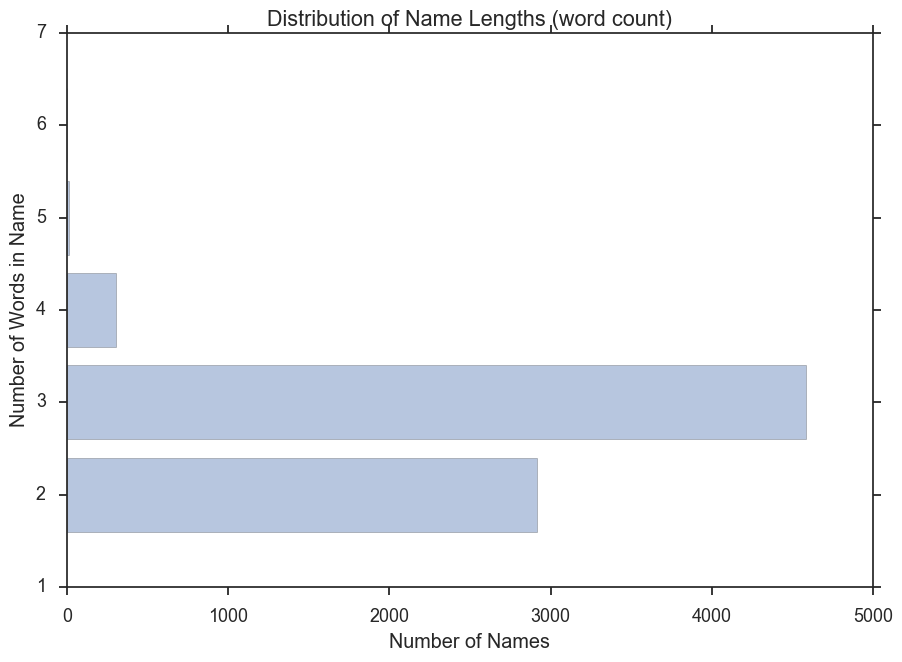

In [40]:
name_length_counts = df_15.groupby(["name_word_count"])[["name_word_count"]].count()

x = name_length_counts.index
y = name_length_counts.values

plt.barh(x, y,align='center', alpha=0.4)
plt.title("Distribution of Name Lengths (word count)")
plt.xlabel("Number of Names")
plt.ylabel("Number of Words in Name")
plt.show()

In [41]:
def remove_name_suffixes(df):
    i = ["Jr", "II", "III", "Sr", "Jr."]
    name_parts_cleaned = []
    for l in df["name_parts"]:
        for w in l:
            if w in i:
                l.remove(w)
        name_parts_cleaned.append(l)
    df["name_parts"] = name_parts_cleaned
    return None

remove_name_suffixes(df_15)
remove_name_suffixes(df_14)
remove_name_suffixes(df_13)

In [42]:
def make_firstlast_name(df, name_parts_field):
    first_last = []
    for item in df[name_parts_field]:
        if len(item) == 2:
            first_last.append(item[1]+' '+item[0])
        if len(item) == 3:
            first_last.append(item[1]+' '+item[0])
        if len(item) == 4:
            first_last.append(item[2]+' '+item[0]+' '+item[1])
        if len(item) == 5:
            first_last.append(item[3]+' '+item[0]+' '+item[1]+' '+item[2])
        if len(item) == 6:
            first_last.append(item[3]+' '+item[0]+' '+item[1]+' '+item[2])
    df["retiree_name"] = first_last
    return None
    
make_firstlast_name(df_13 ,"name_parts")
make_firstlast_name(df_14 ,"name_parts")
make_firstlast_name(df_15 ,"name_parts")


In [43]:
# Need to see if any of the duplicate employee names (working from 2013 to 2015) match any 2015 retirees.
# pulll out the names in first last format, and then creat a set to eliminate duplicates

def find_dup_employees_names(df, name_field):
    double_name_fl = []
    for index, row in df.iterrows():
        for name in double_name_list:
            if name == row[name_field]:
                double_name_fl.append(row['retiree_name'])
    return double_name_fl

dup_employee_names = find_dup_employees_names(df_15, "Name") + find_dup_employees_names(df_14, "Name") + find_dup_employees_names(df_13, "NAME")
myset = set(dup_employee_names)

In [44]:
myset

{'Anh Nguyen',
 'Benjamin Martinez',
 'Christopher Martin',
 'Christopher Webb',
 'Cindy Nguyen',
 'Daniel Navarro',
 'David Romero',
 'Eric Wong',
 'Hieu Nguyen',
 'James Wilson',
 'Jorge Ibanez',
 'Jose Vazquez',
 'Joseph Guerrero',
 'Martin Perez',
 'Michael Garcia',
 'Michael Jones',
 'My Nguyen',
 'Peter Nguyen',
 'Sandra Lopez',
 'Tam Ngo',
 'Thanh Tran',
 'Thomas Brugge',
 'Viet Nguyen',
 'Yolanda Ortiz'}

In [45]:
# Need to compare the names in myset with the retiree names in retirees

matches = []
for emp_name in myset:
    for ret_name in retirees['retiree_name']:
        if emp_name == ret_name:
            matches.append(emp_name)
matches

['James Wilson']

In [46]:
retirees[retirees["retiree_name"] == "James Wilson"]

,retiree_name,pension_15,disability_15,total_pension_15,years_of_service,year_of_retirement,year,pension_system
1255,James Wilson,53153.4,0.0,53153.4,30.05,2015,2015,San Jose Federated City Employees' Retirement ...


In [48]:
# there were 2 people names James A Wilson working up to 2015 - an Assoc Engineer and a Mechanic,
# both from the Public Works departments. I deduced that the Mechanic is the retiree (payouts in 2015
# vastly different 2015 vs 2014 base pay). Delete the unneeded row (the Assoc Engineer).

df_15.drop([2565], inplace=True)
df_15[df_15["retiree_name"] == "James Wilson"]

,Name,Department,Job Title (as of 12/31/15),Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Defined Contribution Plan Contributions - City Paid,Medical Dental Vision,Retirement Contributions - City Paid*,"Long Term Disability, Life, Medicare",Misc Employment Related Costs,name_parts,name_word_count,retiree_name
3279,"Wilson,James A",Public Works,Temp Employee Retiree U,77817.78,33991.16,3144.42,40548.0,134.2,NaN,1056.22,3705.68,1130.22,NaN,"[Wilson, James, A]",3,James Wilson


In [50]:
df_14.drop([2554], inplace=True)
df_14[df_14["retiree_name"] == "James Wilson"]

,Name,Department Name,Job Title (as of 12/31/14),Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Deferred Comp Paid by Employer,Medical Dental Vision City Paid,Employer's Share Pension Payments,"Long Term Disability, Life, Medicare",Misc Employment Related Costs,name_parts,retiree_name
1935,"Wilson,James A",Public Works,Mechanic,104020.5,69222.4,31185.51,NaN,3612.59,NaN,12998.04,44656.86,1519.09,NaN,"[Wilson, James, A]",James Wilson


In [52]:
df_13.drop([2618], inplace=True)
df_13[df_13["retiree_name"] == "James Wilson"]

,NAME,Department Name,Job Title,Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Deferred Comp Paid by Employer,Medical Dental Vision City Paid,Employer's Share Pension Payments,Retired?,name_parts,retiree_name
2302,"Wilson,James A",General Services,Mechanic,90588.46,67308.8,21339.64,NaN,1940.02,NaN,16139.76,38686.84,No,"[Wilson, James, A]",James Wilson


In [53]:
df_13.shape

(7403, 14)

In [54]:
double_name_list

['Brugge,Thomas',
 'Garcia,Michael',
 'Guerrero,Joseph',
 'Ibanez,Jorge J',
 'Jones,Michael A',
 'Lopez,Sandra',
 'Martin,Christopher',
 'Martinez,Benjamin',
 'Navarro,Daniel',
 'Ngo,Tam',
 'Nguyen,Anh',
 'Nguyen,Cindy',
 'Nguyen,Hieu',
 'Nguyen,My',
 'Nguyen,Peter',
 'Nguyen,Viet',
 'Ortiz,Yolanda',
 'Perez,Martin',
 'Romero,David A',
 'Tran,Thanh',
 'Vazquez,Jose',
 'Webb,Christopher',
 'Wilson,James A',
 'Wong,Eric']

In [55]:
# now that we have manually deleted the James Wilson row that we don't need, we need to remove James A Wilson from
# the duplicate names list. So we don't delete the James A Wilson data we do need.
# Need to research deleting by entry

del double_name_list[-2]


In [56]:
# remove the duplicate employee names. If we don't remove them, there will be many nonsensical matches.

df_13 = df_13[~df_13["NAME"].isin(double_name_list)]
df_14 = df_14[~df_14["Name"].isin(double_name_list)]
df_15 = df_15[~df_15["Name"].isin(double_name_list)]

<div id='joining-tables'/>
## Joining the Tables

In [59]:
u = df_15.merge(df_14, on=['Name'], how='inner')

In [60]:
u.shape

(6513, 30)

In [61]:
v = u.merge(df_13, on=['Name'], how='inner')

In [62]:
v.shape

(5672, 43)

In [63]:
v.rename(columns={'retiree_name-2015':'retiree_name'}, inplace=True)

In [64]:
data = v.merge(retirees, on=['retiree_name'], how='inner')

In [65]:
data["retiree_name"].value_counts()

Ruben Torres             3
Kenneth Johnson          2
Michael Sullivan         2
James Williams           2
James Voreyer            1
Maria Jimenez            1
Leticia Rosales          1
Lynn Harris              1
Mark Smyth               1
Marjorie Beiderman       1
Juan Amarilla            1
Elizabeth Morgan         1
Tami Mason               1
Karen Schlussel          1
George Marcussen         1
Ralph Padilla            1
John Navarra             1
Loralyn Tanase           1
Dale Harris              1
Terri Gomes              1
William Chan             1
Kevin Metcalf            1
Reymartin Cedeno         1
Kenneth Leytem           1
Steven Barnett           1
Stanley White            1
Gilbert Hernandez        1
Richard Bailey           1
Brenda Nakasaki          1
Colleen Cassidy          1
                        ..
Arthur Shinagawa         1
Louis Dominguez          1
Steven Gibson            1
Pamela Burton            1
Henry Lacaze             1
Rosemarie Leon-Monday    1
C

In [66]:
# for people who have identical names (<first> <last> format). Decided which records to delete by looking at department, salary level, payouts, 

names_to_delete = ["Torres,Ruben J", "Torres Jr,Ruben Maximillian", "Johnson,Kenneth W", "Sullivan,Michael E", "Williams,James M"]
data = data[~data["Name"].isin(names_to_delete)]

In [67]:
data.shape

(123, 50)

In [68]:
not_matched = retirees[~retirees["retiree_name"].isin(data["retiree_name"])]

In [69]:
not_matched

,retiree_name,pension_15,disability_15,total_pension_15,years_of_service,year_of_retirement,year,pension_system
1013,Nelson Joslin,58117.68,0.0,58117.68,23.10,2015,2015,San Jose Federated City Employees' Retirement ...
1071,Sharon Caudill,56972.52,0.0,56972.52,25.95,2015,2015,San Jose Federated City Employees' Retirement ...
1452,Joseph Alvarado,48887.16,0.0,48887.16,24.36,2015,2015,San Jose Federated City Employees' Retirement ...
2074,Theresa Morreira-Warn,37498.68,0.0,37498.68,15.06,2015,2015,San Jose Federated City Employees' Retirement ...
2110,Susan Amaro,36889.68,0.0,36889.68,23.44,2015,2015,San Jose Federated City Employees' Retirement ...
2150,Michael Mccullough,36248.04,0.0,36248.04,15.24,2015,2015,San Jose Federated City Employees' Retirement ...
2458,Dana Singh,31178.52,0.0,31178.52,24.31,2015,2015,San Jose Federated City Employees' Retirement ...
2975,Dominic Cavallaro,22794.12,0.0,22794.12,15.87,2015,2015,San Jose Federated City Employees' Retirement ...
3087,Martin Noguez,21193.80,0.0,21193.80,15.41,2015,2015,San Jose Federated City Employees' Retirement ...
3113,Ellya Jeffries,20625.84,0.0,20625.84,11.21,2015,2015,San Jose Federated City Employees' Retirement ...


In [70]:
worked_in_2015 = []
for name in df_15["retiree_name-2015"]:
    for nom in not_matched["retiree_name"]:
        if name == nom:
            worked_in_2015.append(nom)
worked_in_2015          

['John Spicer',
 'Sharon Caudill',
 'Nelson Joslin',
 'Dominic Cavallaro',
 'Joseph Alvarado',
 'Martin Noguez',
 'Dana Singh',
 'Theresa Morreira-Warn',
 'Dwayne Taylor',
 'Susan Amaro']

In [71]:
df_15[df_15["retiree_name-2015"].isin(worked_in_2015)].head()

,Name,Department-2015,Job Title (as of 12/31/15)-2015,Total Cash Compensation-2015,Base Pay-2015,Overtime-2015,Sick and Vacation Payouts-2015,Other Cash Compensation-2015,Defined Contribution Plan Contributions - City Paid-2015,Medical Dental Vision-2015,Retirement Contributions - City Paid*-2015,"Long Term Disability, Life, Medicare-2015",Misc Employment Related Costs-2015,name_parts-2015,name_word_count-2015,retiree_name-2015
1787,"Spicer,John D",Police,Police Lieutenant,116037.20,NaN,NaN,116037.20,NaN,NaN,NaN,NaN,1682.54,NaN,"[Spicer, John, D]",3,John Spicer
3761,"Caudill,Sharon Lee",Planning/Building/Code,Temp Employee Retiree U,68143.58,25498.3,2044.98,40600.30,NaN,NaN,2157.45,14446.11,991.11,17.0,"[Caudill, Sharon, Lee]",3,Sharon Caudill
4997,"Joslin,Nelson E",Fire,Senr Pub Safe Dispatch,35955.00,NaN,NaN,35955.00,NaN,NaN,NaN,NaN,521.35,NaN,"[Joslin, Nelson, E]",3,Nelson Joslin
5050,"Cavallaro Jr.,Dominic Paul",Library,Warehouse Worker II,34242.63,26540.8,6.38,7639.77,55.68,NaN,6400.20,18089.60,451.06,25.5,"[Cavallaro, Dominic, Paul]",4,Dominic Cavallaro
5246,"Alvarado,Joseph",Police,Police Property Supvr,26747.41,NaN,NaN,26747.41,NaN,NaN,NaN,NaN,387.84,NaN,"[Alvarado, Joseph]",2,Joseph Alvarado


In [72]:
worked_in_2014 = []
for name in df_14["retiree_name-2014"]:
    for nom in not_matched["retiree_name"]:
        if name == nom:
            worked_in_2014.append(nom)
worked_in_2014


['Ghebreab Gehal']

In [73]:
df_14[df_14["retiree_name-2014"].isin(worked_in_2014)]

,Name,Department Name-2014,Job Title (as of 12/31/14)-2014,Total Cash Compensation-2014,Base Pay-2014,Overtime-2014,Sick and Vacation Payouts-2014,Other Cash Compensation-2014,Deferred Comp Paid by Employer-2014,Medical Dental Vision City Paid-2014,Employer's Share Pension Payments-2014,"Long Term Disability, Life, Medicare-2014",Misc Employment Related Costs-2014,name_parts-2014,retiree_name-2014
4786,"Gehal,Ghebreab M",Airport,Network Technician II,41122.37,32542.4,NaN,8544.97,35.0,NaN,8150.5,19714.8,582.26,21.25,"[Gehal, Ghebreab, M]",Ghebreab Gehal


In [74]:
worked_in_2013 = []
for name in df_13["retiree_name-2013"]:
    for nom in not_matched["retiree_name"]:
        if name == nom:
            worked_in_2013.append(nom)
worked_in_2013


['Ghebreab Gehal', 'Nelson Joslin', 'Joseph Alvarado', 'Richard Wicklander']

In [75]:
df_13[df_13["retiree_name-2013"].isin(worked_in_2013)]

,Name,Department Name-2013,Job Title-2013,Total Cash Compensation-2013,Base Pay-2013,Overtime-2013,Sick and Vacation Payouts-2013,Other Cash Compensation-2013,Deferred Comp Paid by Employer-2013,Medical Dental Vision City Paid-2013,Employer's Share Pension Payments-2013,Retired?-2013,name_parts-2013,retiree_name-2013
3011,"Gehal,Ghebreab M",Office Of Economic Development,Network Technician II,76325.62,75984.0,163.13,NaN,178.49,NaN,16331.76,43767.07,No,"[Gehal, Ghebreab, M]",Ghebreab Gehal
3387,"Joslin,Nelson E",Fire,Senr Pub Safe Dispatch,69045.94,57656.0,2364.83,3802.38,5222.73,NaN,5102.91,35647.87,No,"[Joslin, Nelson, E]",Nelson Joslin
5294,"Alvarado,Joseph",Police,Police Property Supvr,19370.40,5534.4,NaN,13836.00,NaN,NaN,1354.68,3163.96,No,"[Alvarado, Joseph]",Joseph Alvarado
6308,"Wicklander,Richard G",General Services,Electrician,6329.37,NaN,2524.96,3804.41,NaN,NaN,NaN,NaN,No,"[Wicklander, Richard, G]",Richard Wicklander


<div id='data-4-analysis'/>
# Salary and Retirement Data for Analysis

In [76]:
data.columns

Index([u'Name', u'Department-2015', u'Job Title (as of 12/31/15)-2015',
       u'Total Cash Compensation-2015', u'Base Pay-2015', u'Overtime-2015',
       u'Sick and Vacation Payouts-2015', u'Other Cash Compensation-2015',
       u'Defined Contribution Plan Contributions - City Paid-2015',
       u'Medical Dental Vision-2015',
       u'Retirement Contributions - City Paid*-2015',
       u'Long Term Disability, Life, Medicare-2015',
       u'Misc Employment Related Costs-2015', u'name_parts-2015',
       u'name_word_count-2015', u'retiree_name', u'Department Name-2014',
       u'Job Title (as of 12/31/14)-2014', u'Total Cash Compensation-2014',
       u'Base Pay-2014', u'Overtime-2014', u'Sick and Vacation Payouts-2014',
       u'Other Cash Compensation-2014', u'Deferred Comp Paid by Employer-2014',
       u'Medical Dental Vision City Paid-2014',
       u'Employer's Share Pension Payments-2014',
       u'Long Term Disability, Life, Medicare-2014',
       u'Misc Employment Related Costs-

In [77]:
# have payment information for 123 employees who retired in 2015, plus salaries for their last 3 years of working
data["pension_system"].value_counts()

San Jose Federated City Employees' Retirement System    79
San Jose Police and Fire Retirement Plan                44
Name: pension_system, dtype: int64

In [78]:
data.groupby(["pension_system"])["years_of_service"].agg({"sum": np.sum, "mean": np.mean, "minimum": min, "maximum": max, "count": 'count'})

,count,sum,minimum,maximum,mean
pension_system,,,,,
San Jose Federated City Employees' Retirement System,79,1721.87,5.38,30.16,21.795823
San Jose Police and Fire Retirement Plan,44,1059.47,13.00,29.12,24.078864


In [170]:
data.groupby(["pension_system"])["pension_15"].agg({"sum": np.sum, "mean": np.mean, "minimum": min, "maximum": max})

,sum,minimum,maximum,mean
pension_system,,,,
San Jose Federated City Employees' Retirement System,3773232.36,10460.04,149908.8,47762.434937
San Jose Police and Fire Retirement Plan,3991731.24,48220.56,179610.6,90721.164545


In [99]:
# Federated City Employees' Retirement System: 2.5% x Years of Service x Final Compensation (75% max).
# Final Compensation is highest average monthly salary during 12 consecutive months
# pmt = 0.025*YOS*FAS
# FAS = pmt/(0.025 * YOS)
# Hans Larsen, YOS = 30.15, pmt = 149908.80
# 149908.8/0.75375 = 198



# First 20 years of Service: 50% of final compensation (2.5% per year)
# Beginning of 21st year of service: 3% per year of service X final Compensation (90% max) – All years
# convert to 3% after 20 years of service.

# data_pf = data[data["pension_system"] == "San Jose Police and Fire Retirement Plan"]
#data["years_of_service"].unique

# data_fed = data[data["pension_system"] == "San Jose Federated City Employees' Retirement System"]
# data_fed.shape

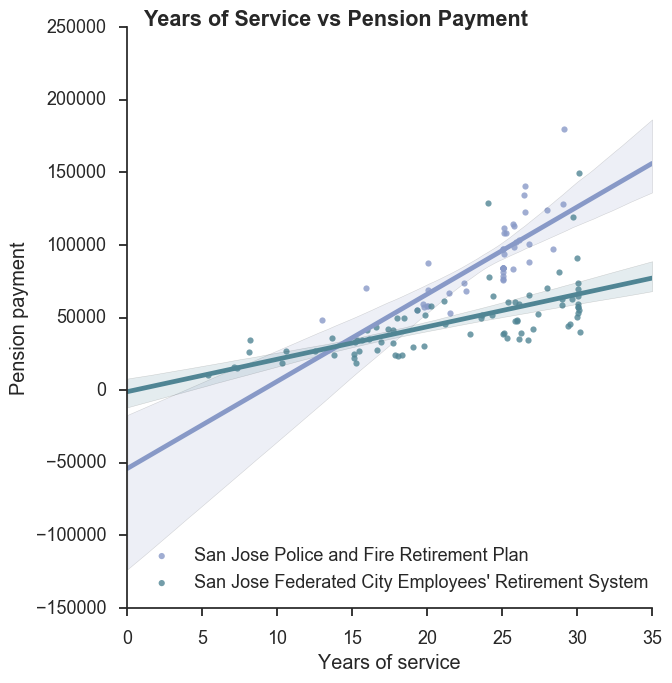

In [224]:
sns.set(style="ticks", context="talk")

# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)


# Plot tip as a function of toal bill across days
g = sns.lmplot(x="years_of_service", y="pension_15", hue = "pension_system", data=data,
               palette=pal, size=7,legend=False)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Years of service", "Pension payment")
g.fig.suptitle('Years of Service vs Pension Payment', fontweight="bold")

plt.legend(loc='lower left')

plt.savefig('/Users/andrewgstark/Desktop/DSI-SF-4-andrewgstark/gitpages/andrewgstark.github.io/JEKYLL-SITE-REPOSITORY-NAME/myblog/assets/service_vs_pensionpay.png',transparent=True)

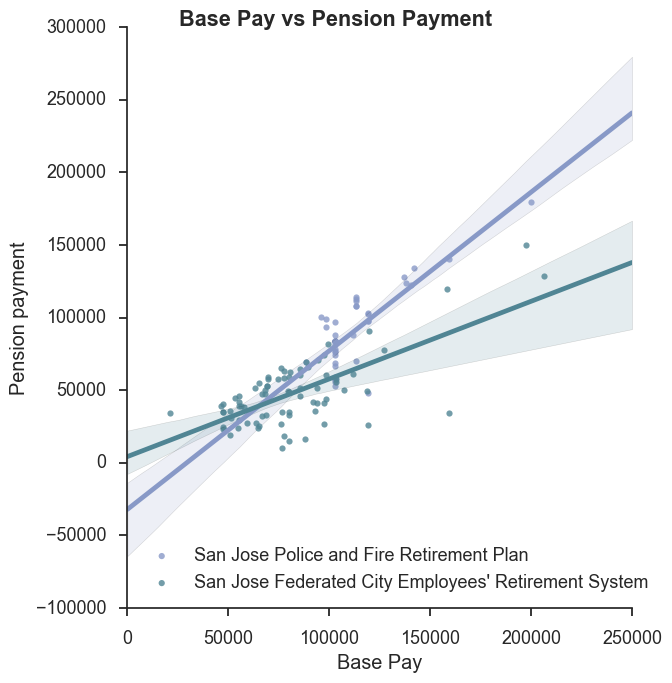

In [222]:
sns.set(style="ticks", context="talk")

# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)


# Plot tip as a function of toal bill across days
g = sns.lmplot(x="Base Pay-2014", y="pension_15", hue = "pension_system", data=data,
               palette=pal, size=7,legend=False)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Base Pay", "Pension payment")
g.fig.suptitle('Base Pay vs Pension Payment',fontweight='bold')

plt.legend(loc='lower left')

plt.savefig('/Users/andrewgstark/Desktop/DSI-SF-4-andrewgstark/gitpages/andrewgstark.github.io/JEKYLL-SITE-REPOSITORY-NAME/myblog/assets/base_vs_pensionpay.png',transparent=True)

In [127]:
# create X and y for the Police and Fire retirees
feature_cols = ['Base Pay-2014', 'Base Pay-2013', 'years_of_service']

X = data[data["pension_system"] == "San Jose Police and Fire Retirement Plan"][['Base Pay-2014', 'Base Pay-2013', 'years_of_service']]
y = data[data["pension_system"] == "San Jose Police and Fire Retirement Plan"]['pension_15']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

-123290.017022
[ -3.70765101e-01   1.43658167e+00   4.18719936e+03]


In [104]:
zip(feature_cols, lm.coef_)

[('Base Pay-2014', -0.37076510090664189),
 ('Base Pay-2013', 1.4365816676039278),
 ('years_of_service', 4187.1993610725049)]

In [107]:
lm.predict([100000, 95000, 15])

/Users/andrewgstark/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 38916.72172545])

In [1]:
pred_pension_pf = data[data["pension_system"] == "San Jose Police and Fire Retirement Plan"][['Name','Base Pay-2014', 'Base Pay-2013', 'years_of_service','pension_15']]
# pred_pension_pf["predicted_pension"] = 
pred_pension_pf.reindex
pred_pension_pf.head()
predicted_pension = []
for index, row in pred_pension_pf.iterrows():
    predicted_pension.append(row["Base Pay-2014"]*(-0.37076510090664189) + row["Base Pay-2013"]*1.4365816676039278+ row["years_of_service"]*4187.1993610725049 -123290.017022)
pred_pension_pf["predicted pension"] = predicted_pension

differences = []
for index, row in pred_pension_pf.iterrows():
    differences.append(row["pension_15"] - row["predicted pension"])
pred_pension_pf["diff"] = differences

diff_pct = []
for index, row in pred_pension_pf.iterrows():
    diff_pct.append(row["diff"] / row["predicted pension"])
pred_pension_pf["diff"] = diff_pct


pred_pension_pf.sort_values(by="diff",inplace=True,ascending=True)
pred_pension_pf

NameError: name 'data' is not defined

In [130]:
import ipywidgets as widgets
from ipywidgets import Dropdown
from IPython.display import clear_output

def handlechange(variable, changed_value):
    clear_output()
    N = 3
    i = changed_value
    FAS = 0
    if data.iloc[i]["pension_system"] == "San Jose Federated City Employees' Retirement System":
        FAS = data.iloc[i]["pension_15"]/(0.025 * data.iloc[i]["years_of_service"])
    if data.iloc[i]["pension_system"] == "San Jose Police and Fire Retirement Plan":
        FAS = data.iloc[i]["pension_15"]/(0.03 * data.iloc[i]["years_of_service"])

    pension_pay = data.iloc[i]["pension_15"]
    department = data.iloc[i]["Department-2015"]
    title = data.iloc[i]["Job Title (as of 12/31/15)-2015"]
    retiree_name = data.iloc[i]["Name"]
    base_pay = (data.iloc[i]["Base Pay-2013"], data.iloc[i]["Base Pay-2014"],data.iloc[i]["Base Pay-2015"])
    overtime = (data.iloc[i]["Overtime-2013"], data.iloc[i]["Overtime-2014"],data.iloc[i]["Overtime-2015"])
    payouts = (data.iloc[i]["Sick and Vacation Payouts-2013"], data.iloc[i]["Sick and Vacation Payouts-2014"],data.iloc[i]["Sick and Vacation Payouts-2015"])
    other_comp = (data.iloc[i]["Overtime-2013"], data.iloc[i]["Overtime-2014"],data.iloc[i]["Overtime-2015"])
    years_of_service = str(data.iloc[i]["years_of_service"])

    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, base_pay, width, color='#d62728')
    p2 = plt.bar(ind, overtime, width, bottom=base_pay)
    p3 = plt.bar(ind, payouts, width, bottom=overtime, color='green')
    p4 = plt.bar(ind, other_comp, width, bottom=payouts, color='purple')

    x = [0,N-1]
    y = [pension_pay,pension_pay]
    plt.plot(x, y)

    x = [0,N-1]
    y = [FAS,FAS]
    plt.plot(x, y)

    plt.ylabel('Annual Pay')
    plt.title(retiree_name+' - '+title+'\n'+years_of_service+" years ("+department+")")
    plt.xticks(ind, ('2013', '2014', '2015'))
# plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0], p3[0],p4[0]), ('Base Pay', 'Overtime','Sick and Holiday Payouts','Other Pay'))


    plt.show()
    return None

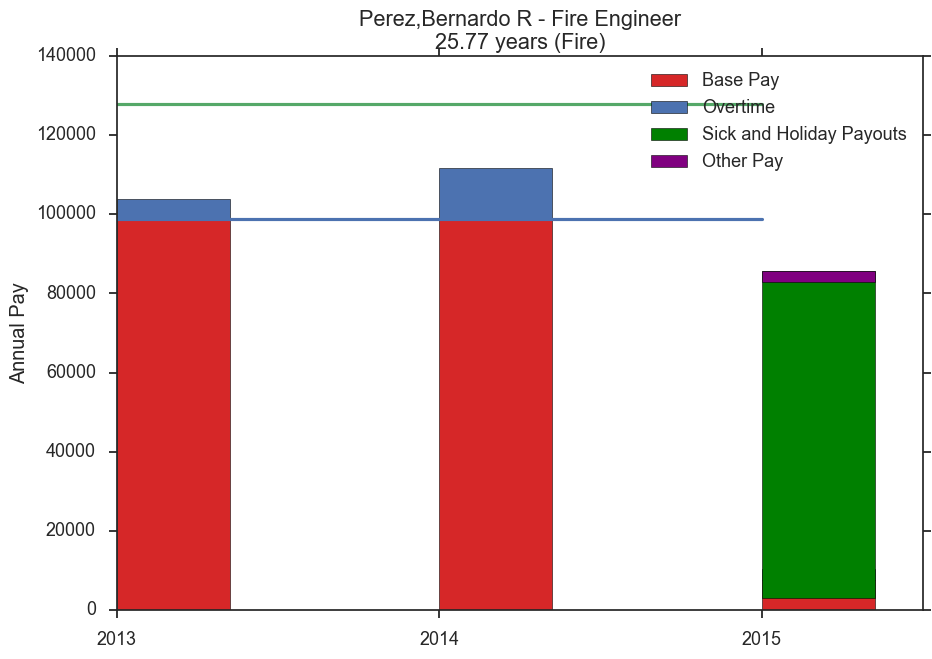

In [131]:
from ipywidgets import Dropdown
from IPython.display import clear_output

names = data["Name"].values
indices = np.arange(0,len(names))
names_and_indices = dict(zip(names, indices))

type_sel = Dropdown(description="Retiree name:", options=names_and_indices)
type_sel.on_trait_change(handlechange, name="value")
type_sel

In [176]:
data[['Name','Base Pay-2015', 'Overtime-2015','Sick and Vacation Payouts-2015', 'Other Cash Compensation-2015','Base Pay-2014', 'Overtime-2014','Sick and Vacation Payouts-2014', 'Other Cash Compensation-2014','Base Pay-2013', 'Overtime-2013','Sick and Vacation Payouts-2013', 'Other Cash Compensation-2013']].head()

,Name,Base Pay-2015,Overtime-2015,Sick and Vacation Payouts-2015,Other Cash Compensation-2015,Base Pay-2014,Overtime-2014,Sick and Vacation Payouts-2014,Other Cash Compensation-2014,Base Pay-2013,Overtime-2013,Sick and Vacation Payouts-2013,Other Cash Compensation-2013
0,"Unland,James C",13951.20,29370.18,171489.44,1130.70,118965.60,NaN,NaN,11847.86,112528.00,NaN,NaN,9141.25
1,"Larsen,Hans F",80932.21,NaN,117582.32,1750.00,197427.21,NaN,NaN,4200.00,182143.29,NaN,NaN,7306.09
2,"Albin,Gregory R",10772.80,35827.98,148189.69,1886.42,136791.20,8618.35,NaN,26541.76,123160.00,4222.55,NaN,22356.42
4,"Sullivan,Michael J",12052.80,21513.62,127600.25,988.32,102772.80,8858.16,NaN,10326.81,97198.40,13262.02,NaN,7991.53
5,"Kuchac,Timothy R",16159.20,37782.23,134981.16,1296.30,137789.60,26298.84,NaN,13615.34,124792.00,26785.56,NaN,10034.28


In [178]:
# Save the cleaned data to a csv file

data.to_csv(path_or_buf="~/Desktop/DSI-SF-4-andrewgstark/capstone/capstone_AGS_cleaned_data.csv")


In [179]:
test = pd.read_csv('~/Desktop/DSI-SF-4-andrewgstark/capstone/capstone_AGS_cleaned_data.csv')
test

,Unnamed: 0,Name,Department-2015,Job Title (as of 12/31/15)-2015,Total Cash Compensation-2015,Base Pay-2015,Overtime-2015,Sick and Vacation Payouts-2015,Other Cash Compensation-2015,Defined Contribution Plan Contributions - City Paid-2015,...,Retired?-2013,name_parts-2013,retiree_name-2013,pension_15,disability_15,total_pension_15,years_of_service,year_of_retirement,year,pension_system
0,0,"Unland,James C",Police,Police Sergeant,215941.52,13951.20,29370.18,171489.44,1130.70,NaN,...,No,"['Unland', 'James', 'C']",James Unland,102298.56,0.0,102298.56,25.92,2015,2015,San Jose Police and Fire Retirement Plan
1,1,"Larsen,Hans F",Transportation,Dir of Transportation U,200264.53,80932.21,NaN,117582.32,1750.00,NaN,...,No,"['Larsen', 'Hans', 'F']",Hans Larsen,149908.80,0.0,149908.80,30.13,2015,2015,San Jose Federated City Employees' Retirement ...
2,2,"Albin,Gregory R",Police,Police Lieutenant,196676.89,10772.80,35827.98,148189.69,1886.42,NaN,...,No,"['Albin', 'Gregory', 'R']",Gregory Albin,128167.68,0.0,128167.68,29.06,2015,2015,San Jose Police and Fire Retirement Plan
3,4,"Sullivan,Michael J",Police,Police Officer,162154.99,12052.80,21513.62,127600.25,988.32,NaN,...,No,"['Sullivan', 'Michael', 'J']",Michael Sullivan,84117.48,0.0,84117.48,25.04,2015,2015,San Jose Police and Fire Retirement Plan
4,5,"Kuchac,Timothy R",Police,Police Lieutenant,190218.89,16159.20,37782.23,134981.16,1296.30,NaN,...,No,"['Kuchac', 'Timothy', 'R']",Timothy Kuchac,123921.60,0.0,123921.60,27.99,2015,2015,San Jose Police and Fire Retirement Plan
5,6,"Torres,Ruben L",Fire,Fire Chief U,190193.03,24142.05,NaN,164279.68,1771.30,NaN,...,No,"['Torres', 'Ruben', 'L']",Ruben Torres,179610.60,0.0,179610.60,29.12,2015,2015,San Jose Police and Fire Retirement Plan
6,9,"Olmos,Albert N",Fire,Fire Division Chief,170088.79,12433.68,NaN,156198.93,1456.18,NaN,...,No,"['Olmos', 'Albert', 'N']",Albert Olmos,140637.60,0.0,140637.60,26.50,2015,2015,San Jose Police and Fire Retirement Plan
7,10,"Pham,Uyen T",Police,Police Officer,158613.16,12052.80,17829.04,126930.63,1800.69,NaN,...,No,"['Pham', 'Uyen', 'T']",Uyen Pham,84117.48,0.0,84117.48,25.04,2015,2015,San Jose Police and Fire Retirement Plan
8,11,"Foster,Terry L",Police,Police Officer,154280.33,43691.40,17686.00,89344.87,3558.06,NaN,...,No,"['Foster', 'Terry', 'L']",Terry Foster,58273.20,0.0,58273.20,20.01,2015,2015,San Jose Police and Fire Retirement Plan
9,12,"Newton,William A",Fire,Fire Captain,147130.57,52291.20,5834.47,83147.68,5857.22,NaN,...,No,"['Newton', 'William', 'A']",William Newton,108274.56,0.0,108274.56,25.24,2015,2015,San Jose Police and Fire Retirement Plan


In [180]:
a = df_15.groupby(["Base Pay-2015"])["Total Cash Compensation-2015", "Retirement Contributions - City Paid*-2015", 'Long Term Disability, Life, Medicare-2015','Misc Employment Related Costs-2015']
a

In [307]:
df_15["Retirement Contributions - City Paid*-2015"].sum()/df_15["Total Cash Compensation-2015"].sum()

0.532998299812429

In [308]:
df_14["Employer's Share Pension Payments-2014"].sum()/df_14["Total Cash Compensation-2014"].sum()

0.5501720229634859

In [309]:
df_13["Employer's Share Pension Payments-2013"].sum()/df_13["Total Cash Compensation-2013"].sum()

# Matt Cornett, compliance at GAP

0.52385106499628

In [184]:
data.columns

data["Retirement Contributions - City Paid*-2015"].sum()/data["Base Pay-2015"].sum()

0.7150383123147387

In [185]:
df_15["Retirement Contributions - City Paid*-2015"].sum()/7400

39383.77349999964

In [186]:
df_15.columns

Index([u'Name', u'Department-2015', u'Job Title (as of 12/31/15)-2015',
       u'Total Cash Compensation-2015', u'Base Pay-2015', u'Overtime-2015',
       u'Sick and Vacation Payouts-2015', u'Other Cash Compensation-2015',
       u'Defined Contribution Plan Contributions - City Paid-2015',
       u'Medical Dental Vision-2015',
       u'Retirement Contributions - City Paid*-2015',
       u'Long Term Disability, Life, Medicare-2015',
       u'Misc Employment Related Costs-2015', u'name_parts-2015',
       u'name_word_count-2015', u'retiree_name-2015'],
      dtype='object')

## Tracking Retirement Cost

# data files from SCO: YYYY_City.csv, (2009 through 2015)




In [85]:
# start tracking the retirement expense from 2011, no data for previous years

city_data_sco = pd.read_csv('../capstone/CityData/2015_City.csv', skiprows=[0,1,2,3])
city_data_sco.columns

Index([u'Year', u'Entity Type', u'Entity Group', u'Entity Name',
       u'Department / Subdivision', u'Position', u'Elected Official',
       u'Judicial', u'Other Positions', u'Min Classification Salary',
       u'Max Classification Salary', u'Reported Base Wage', u'Regular Pay',
       u'Overtime Pay', u'Lump-Sum Pay', u'Other Pay', u'Total Wages',
       u'Defined Benefit Plan', u'Employees Retirement Cost Covered',
       u'Deferred Compensation Plan', u'Health Dental Vision',
       u'Total Retirement and Health Cost', u'Pension Formula', u'Entity URL',
       u'Entity Population', u'Last Updated', u'Entity County',
       u'Special District Activities'],
      dtype='object')

In [98]:
data_sj = city_data_sco[city_data_sco["Entity Name"] == "San Jose"]
data_sj["Pension Formula"].value_counts()

formula_1 = "2.5% @ 55 yrs, any age w/ 30 yrs, 75% max"
formula_2 = "Too Many Formulas to List"
formula_3 = "2% @ 65 yrs, 65% max"
formula_4 = "2% @ 55 yrs"
formula_5 = "2% @ 62 yrs"

data_sj[data_sj["Pension Formula"]  == formula_5]["Department / Subdivision"].value_counts()

City Council    4
Name: Department / Subdivision, dtype: int64

In [320]:
#city_data_sco.shape
#city_data_sco["Entity Name"].unique()
search_city = "Los Angeles"
city_data_sco[city_data_sco["Entity Name"] == search_city][['Regular Pay','Overtime Pay', 'Lump-Sum Pay', 'Other Pay', 'Total Wages','Defined Benefit Plan', u'Employees Retirement Cost Covered',
       u'Deferred Compensation Plan', u'Health Dental Vision',
       u'Total Retirement and Health Cost']]

,Regular Pay,Overtime Pay,Lump-Sum Pay,Other Pay,Total Wages,Defined Benefit Plan,Employees Retirement Cost Covered,Deferred Compensation Plan,Health Dental Vision,Total Retirement and Health Cost
93850,NaN,NaN,NaN,NaN,56889,NaN,0.0,0.0,8749.0,8749
93851,NaN,NaN,NaN,NaN,59772,NaN,0.0,0.0,8749.0,8749
93852,NaN,NaN,NaN,NaN,71495,NaN,0.0,0.0,8749.0,8749
93853,NaN,NaN,NaN,NaN,65893,NaN,0.0,0.0,8749.0,8749
93854,NaN,NaN,NaN,NaN,71507,NaN,0.0,0.0,8749.0,8749
93855,NaN,NaN,NaN,NaN,69011,NaN,0.0,0.0,8749.0,8749
93856,NaN,NaN,NaN,NaN,59844,NaN,0.0,0.0,8749.0,8749
93857,NaN,NaN,NaN,NaN,60146,NaN,0.0,0.0,8749.0,8749
93858,NaN,NaN,NaN,NaN,75511,NaN,0.0,0.0,8749.0,8749
93859,NaN,NaN,NaN,NaN,76589,NaN,0.0,0.0,8749.0,8749


In [306]:
#2011: 37%, 2012: 51%, 2013: 11%, 2014: 56.2%, 2015: 55.1%

search_city = "San Jose"

(city_data_sco[city_data_sco["Entity Name"] == search_city]['Total Retirement and Health Cost'].sum() - city_data_sco[city_data_sco["Entity Name"] == search_city]['Health Dental Vision'].sum())/city_data_sco[city_data_sco["Entity Name"] == search_city]['Total Wages'].sum()

0.5509422935794775

# City of Los Angeles Payroll Data
If there is time, perform the same analysis to the 50K+ employees of the City of Los Angeles.


In [95]:
# City of LA payroll data

df = pd.read_csv('../../../Downloads/LA_City_Payroll_Data.csv')
# df["Record Number"].value_counts()

df_16 = df[df["Year"]==2016 ]
df_15 = df[df["Year"]==2015 ]
df_14 = df[df["Year"]==2014 ]
df_13 = df[df["Year"]==2013 ]

In [103]:
df_13["Job Class Title"].unique()

array(['Warehouse & Toolroom Worker', 'Firefighter III',
       'Principal Recreation Supervisor I', ...,
       'Chief Special Investigator', 'Fire Helicopter Pilot II',
       'Risk Management and Prevention Program Specialist'], dtype=object)

In [85]:
df_15.columns

Index([u'Row ID', u'Year', u'Department Title', u'Payroll Department',
       u'Record Number', u'Job Class Title', u'Employment Type',
       u'Hourly or Event Rate', u'Projected Annual Salary', u'Q1 Payments',
       u'Q2 Payments', u'Q3 Payments', u'Q4 Payments',
       u'Payments Over Base Pay', u'% Over Base Pay', u'Total Payments',
       u'Base Pay', u'Permanent Bonus Pay', u'Longevity Bonus Pay',
       u'Temporary Bonus Pay', u'Lump Sum Pay', u'Overtime Pay',
       u'Other Pay & Adjustments', u'Other Pay (Payroll Explorer)', u'MOU',
       u'MOU Title', u'FMS Department', u'Job Class', u'Pay Grade',
       u'Average Health Cost', u'Average Dental Cost', u'Average Basic Life',
       u'Average Benefit Cost', u'Benefits Plan', u'Job Class Link'],
      dtype='object')

In [110]:
# 3 record numbers have three rows: 1357461224, 2613597579, 3706493275
# 

#row_count = df_15["Record Number"].value_counts()
#row_count
#df_15[df_15["Record Number"]=="1357461224" ]
df_15["Department Title"].unique()

array(['Aging', 'Airports (LAWA)', 'Animal Services',
       'Building and Safety', 'City Administrative Officer (CAO)',
       'City Attorney', 'City Clerk',
       'City Employees Retirement System (LACERS)',
       'City Ethics Commission', 'City Planning', 'Controller',
       'Council District 02 (CD 2)', 'Council District 04 (CD 4)',
       'Council District 06 (CD 6)', 'Cultural Affairs',
       'Economic And Workforce Development Department (EWDD)',
       'El Pueblo De Los Angeles Historical Monument Authority',
       'Emergency Management', 'Fire (LAFD)', 'General Services',
       'Harbor (Port of LA)',
       'Housing And Community Investment Department',
       'Information Technology Agency', 'Library',
       'Neighborhood Empowerment (DONE)', 'Office of Finance',
       'Office of the Chief Legislative Analyst (CLA)', 'Pension (LAFPP)',
       'Personnel', 'Police (LAPD)',
       'Public Works - Contract Administration',
       'Public Works - Engineering', 'Public Wor

In [151]:
a = df_15.groupby(["Department Title"])["Total Payments"].sum()
a.sort_values()

Department Title
Aging                                                           $11645.76$10886.40$10719.36$8341.87$7274.40$98...
City Employees Retirement System (LACERS)                       $13674.95$10520.79$7954.07$6280.22$3728.17$232...
Council District 01 (CD 1)                                      $136990.40$103480.00$85483.20$77352.56$74464.0...
Office of Finance                                               $14656.90$12374.37$2115.36$141416.01$89048.76$...
Pension (LAFPP)                                                 $15229.53$13710.07$1990.42$1829.03$1150.00$105...
Council District 06 (CD 6)                                      $1538.99$1428.51$65654.40$182656.15$52438.40$6...
Public Works - Board of Public Works                            $167102.82$66189.60$64464.47$170901.12$146554....
City Ethics Commission                                          $16949.00$15863.79$14385.53$9156.13$92500.00$6...
Public Works - Street Services                                  $17247.

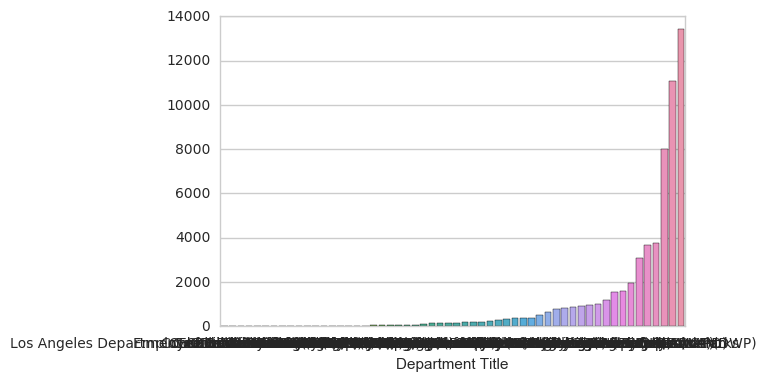

In [148]:
sns.set_style("whitegrid")
x=a.index
y=a.values
ax = sns.barplot(x=x, y=y)


In [140]:
a = a.sort_values()

In [82]:
count_two = 0
for num in row_count.values:
    if num == 2:
        count_two = count_two+1
count_two

781

In [111]:
len(df_14["Record Number"].unique())

56541

In [ ]:
# City of SF payroll data

